<a href="https://colab.research.google.com/github/saghar-trade/Decision-Tree/blob/main/decision_tree_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from matplotlib.colors import ListedColormap

In [6]:
iris=datasets.load_iris()
x=iris.data[:,[2,3]]
y=iris.target

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=0)
tree=DecisionTreeClassifier(criterion='entropy', max_depth=3 , random_state=0)

In [8]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
def plot_decision_regression(X, y,classifier, test_idx=None, resolution=0.02):
  markers=('a','x','^','o','v')
  colors=('red','blue', 'green','gray','cyan')
  cmap=ListedColormap(colors[:len(np.unique(y))])
  x1_min, x1_max=x[:,0].min()-1, x[:,0].max()+1
  x2_min, x2_max=x[:,1].min()-1, x[:,1].max()+1
  xx1, xx2=np.meshgrid(np.arange(x1_min,x1_max, resolution),np.arange(x2_min,x2_max, resolution))
  z=classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  z=z.reshape(xx1.shape)
  plt.contourf(xx1,xx2,z,alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())
  for idx , c1 in enumerate (np.unique(y)):
    plt.scatter(x=X[y==c1, 0], y=X[y==c1, 1], alpha=0.8, c=cmap(idx), marker=markers(idx))
    if text_idx:
      x_test,y_test=X[test_idx,:], y[test_idx]

  plt.scatter(x_test[:,0], x_test[:,1], c='', alpha=1.0, marker='o', linewidths=1, s=55, )

 plt.xlabel("petal length[cm]")
 plt.ylabel("petal width[cm]")
 plt.legend(loc='upper left')
 plt.grid(True)
 plt.show()

In [17]:
def plot_decision_boundary(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', '^', 'o', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # تعیین محدوده‌ی نمودار
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # پیش‌بینی روی کل فضای ویژگی برای رسم ناحیه تصمیم
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # رسم کانتور
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # رسم داده‌ها
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=f"Class {cl}",
                    edgecolor='black')

    # اگر اندیس‌های تست داده شده باشند، آن‌ها را هایلایت کن
    if test_idx is not None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    facecolors='none', edgecolor='black',
                    alpha=1.0, linewidths=1, marker='o',
                    s=100, label='Test set')
    plt.xlabel("petal length[cm]")
    plt.ylabel("petal width[cm]")
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()


In [14]:
x_combined=np.vstack((x_train, x_test))
y_combined=np.hstack((y_train, y_test))

/tmp/ipython-input-4064571366.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


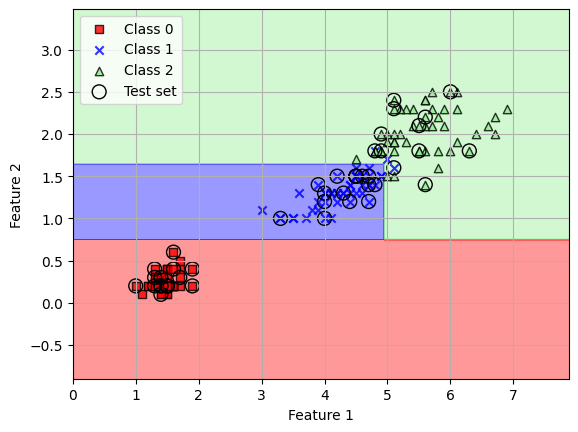

In [15]:
plot_decision_boundary(x_combined, y_combined, classifier=tree, test_idx=range(105,150))